# Graph Coloring Problem

$$
\begin{align}
    \text{min} \quad & \sum_{c \in C} y_{c} \\
    \text{s.t} \quad & \sum_{c \in C} x_{i, c} = 1 & \forall \; i \in N \\
    & x_{i, c} + x_{j, c} \leq y_{c} & \forall \; i, j \in E, c \in C \\
    & y_{C_{k-1}} \leq y_{C_{k}} & \forall \; k \in (2, ..., |C|) \\
    & x_{i, c} \in \{0, 1\} & \forall \; i \in N, c \in C \\
    & y_{c} \in \{0, 1\} & \forall \; c \in C
\end{align}
$$

In [1]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

from gcol.dataloader import load_instance
from gcol.dsatur import DSatur
from gcol.ilp import ilp_from_dsatur
from gcol.plot import draw_colored_graph, draw_from_nodes, draw_colored_gif

In [2]:
data = load_instance("instances/input_32.txt")

In [3]:
dsatur = DSatur(data["nodes"], data["edges"])
dsatur.solve(save_history=True)

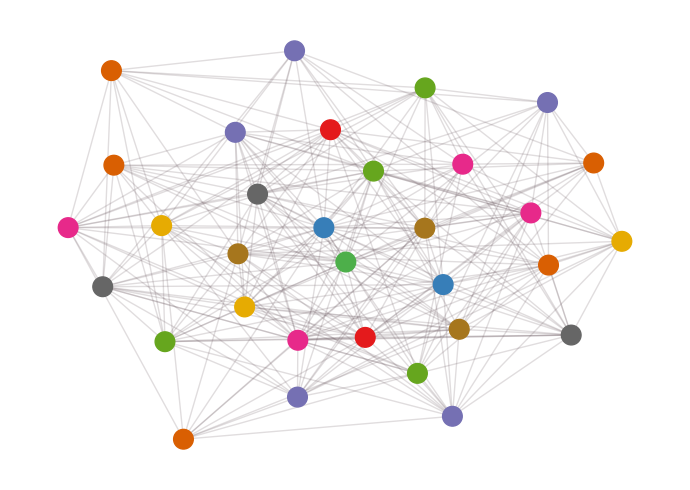

In [4]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_from_nodes(dsatur.N, ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()

In [ ]:
# draw_colored_gif(
#     "coloring_history_loop_32.gif", dsatur.history, use_labels=0, edge_alpha=0.2, edge_color="#68555D",
#     layout_iter=1000, seed=12, figsize=[7, 5], dpi=200, plot_margins=False,
#     duration=250,
# )

In [5]:
ilp = ilp_from_dsatur(dsatur)

In [6]:
solver = pyo.SolverFactory("appsi_highs")
res = solver.solve(ilp, tee=True)
print(res)

Running HiGHS 1.5.3 [date: 2023-05-16, git hash: 594fa5a9d]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
5201 rows, 330 cols, 15818 nonzeros
2621 rows, 330 cols, 8078 nonzeros
2619 rows, 328 cols, 7558 nonzeros
Objective function is integral with scale 1

Solving MIP model with:
   2619 rows
   328 cols (328 binary, 0 integer, 0 implied int., 0 continuous)
   7558 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   2               inf                  inf        0      0      0         0     0.1s
         0       0         0   0.00%   2               inf                  inf        0      0     14       274     0.1s
 F       0       0         0   0.00%   7               10                30.00%     1356     52    201     46805 

In [7]:
colors = []
nodes = []
for n in ilp.N:
    nodes.append(n)
    for c in ilp.C:
        if round(ilp.x[n, c].value, ndigits=0) == 1:
            colors.append(c)

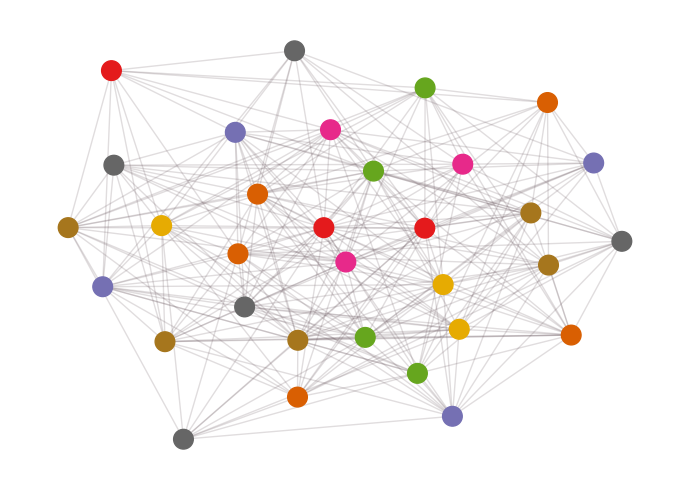

In [8]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=100)
draw_colored_graph(nodes, colors, data["edges"], ax=ax, plot_margins=False, use_labels=0, edge_alpha=0.2, edge_color="#68555D", layout_iter=1000, seed=12)
fig.tight_layout()
plt.show()